In [1]:
import urllib.request
import json
import numpy as np
import pandas as pd
import altair
import pprint

In [2]:
base = 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/'
url = '/Persoon?&$expand=FractieZetelPersoon($expand=FractieZetel($expand=Fractie))&$count=true'
end = '&$count=true&$format=application/json;odata.metadata=full'
response = urllib.request.urlopen(base+url)
data = response.read()      # a `bytes` object
data = json.loads(data)

In [3]:
data.keys()

dict_keys(['@odata.context', '@odata.count', 'value', '@odata.nextLink'])

In [23]:
pprint(data['value'][0]['FractieZetelPersoon'][0]['FractieZetel'])

{'@odata.editLink': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/FractieZetel(0d23189b-ead4-4576-8cbd-6db0ac1ccc04)',
 '@odata.id': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/FractieZetel(0d23189b-ead4-4576-8cbd-6db0ac1ccc04)',
 '@odata.type': '#TK.DA.GGM.OData.FractieZetel',
 'ApiGewijzigdOp': '2019-04-01T12:49:16.857Z',
 'ApiGewijzigdOp@odata.type': '#DateTimeOffset',
 'Fractie': {'#TK.DA.GGM.OData.Resource': {'target': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Fractie(65129918-f256-4975-9da4-488da34d6695)/TK.DA.GGM.OData.Resource()',
                                           'title': 'Resource'},
             '@odata.editLink': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Fractie(65129918-f256-4975-9da4-488da34d6695)',
             '@odata.id': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Fractie(65129918-f256-4975-9da4-488da34d6695)',
             '@odata.type': '#TK.DA.GGM.OData.Fractie',
             'AantalStemmen': 1372941,
   

In [5]:
# deze link doet het ook
url = '/Persoon?$orderby=Achternaam&$filter=FractieZetelPersoon/any(a:a/TotEnMet%20eq%20null)&$expand=FractieZetelPersoon($expand=FractieZetel($expand=Fractie))&$count=true'

In [6]:
base = 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/'
url = '/Persoon?'
end = '&$count=true&$format=application/json;odata.metadata=full'
response = urllib.request.urlopen(base+url+end)
data = response.read()      # a `bytes` object
data = json.loads(data)

In [7]:
for k in data['value'][1].keys():
    if '@odata.associationLink' in k: print(k)

ActiviteitActor@odata.associationLink
ZaakActor@odata.associationLink
DocumentActor@odata.associationLink
CommissieZetelVastPersoon@odata.associationLink
CommissieZetelVervangerPersoon@odata.associationLink
FractieZetelPersoon@odata.associationLink
PersoonGeschenk@odata.associationLink
PersoonNevenfunctie@odata.associationLink
PersoonContactinformatie@odata.associationLink
PersoonLoopbaan@odata.associationLink
PersoonOnderwijs@odata.associationLink
PersoonReis@odata.associationLink
Stemming@odata.associationLink


In [8]:
id = data['value'][0]['Id']
print(id)

e55ca731-e1aa-44c0-a5f3-0008c23976f7


In [24]:
base = 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/'
url = '/Persoon('+id+')/Resource'
end = '&$count=true&$format=application/json;odata.metadata=full'
response = urllib.request.urlopen(base+url)
data = response.read()      # a `bytes` object

In [26]:
base+url

'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0//Persoon(e55ca731-e1aa-44c0-a5f3-0008c23976f7)/Resource'

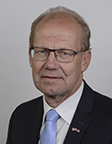

In [25]:
from IPython.display import Image 
Image(data)

In [11]:
base = 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/'
url = '/Persoon?$filter=PersoonGeschenk/any(a:a%20ne%20null)&$expand=PersoonGeschenk($count=true;$top=200)'
end = '&$count=true&$format=application/json;odata.metadata=full'
response = urllib.request.urlopen(base+url+end)
data = response.read()      # a `bytes` object
data = json.loads(data)

In [12]:
for k in data['value'][0].keys():
    if '@odata.associationLink' in k: print(k)

ActiviteitActor@odata.associationLink
ZaakActor@odata.associationLink
DocumentActor@odata.associationLink
CommissieZetelVastPersoon@odata.associationLink
CommissieZetelVervangerPersoon@odata.associationLink
FractieZetelPersoon@odata.associationLink
PersoonNevenfunctie@odata.associationLink
PersoonContactinformatie@odata.associationLink
PersoonLoopbaan@odata.associationLink
PersoonOnderwijs@odata.associationLink
PersoonReis@odata.associationLink
Stemming@odata.associationLink
PersoonGeschenk@odata.associationLink


In [13]:
data['value'][0]

{'@odata.type': '#TK.DA.GGM.OData.Persoon',
 '@odata.id': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Persoon(1c889902-6ede-427c-8682-000f683fffaa)',
 '@odata.editLink': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Persoon(1c889902-6ede-427c-8682-000f683fffaa)',
 'Id@odata.type': '#Guid',
 'Id': '1c889902-6ede-427c-8682-000f683fffaa',
 'Nummer': 2491,
 'Titels': 'MA',
 'Initialen': 'M.',
 'Tussenvoegsel': None,
 'Achternaam': 'Agema',
 'Voornamen': 'Marie-Fleur',
 'Roepnaam': 'Fleur',
 'Geslacht': 'vrouw',
 'Functie': 'Tweede Kamerlid',
 'Geboortedatum@odata.type': '#DateTimeOffset',
 'Geboortedatum': '1976-09-16T00:00:00+02:00',
 'Geboorteplaats': 'Purmerend',
 'Geboorteland': 'Nederland',
 'Overlijdensdatum': None,
 'Overlijdensplaats': None,
 'Woonplaats': 'Den Haag',
 'Land': 'NL',
 'ContentType': 'image/jpeg',
 'ContentLength': 34744,
 'GewijzigdOp@odata.type': '#DateTimeOffset',
 'GewijzigdOp': '2019-04-01T10:40:33+02:00',
 'ApiGewijzigdOp@odata.type': '#DateTi

In [14]:
data['@odata.count']

390

In [15]:
data['value'][0]

{'@odata.type': '#TK.DA.GGM.OData.Persoon',
 '@odata.id': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Persoon(1c889902-6ede-427c-8682-000f683fffaa)',
 '@odata.editLink': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Persoon(1c889902-6ede-427c-8682-000f683fffaa)',
 'Id@odata.type': '#Guid',
 'Id': '1c889902-6ede-427c-8682-000f683fffaa',
 'Nummer': 2491,
 'Titels': 'MA',
 'Initialen': 'M.',
 'Tussenvoegsel': None,
 'Achternaam': 'Agema',
 'Voornamen': 'Marie-Fleur',
 'Roepnaam': 'Fleur',
 'Geslacht': 'vrouw',
 'Functie': 'Tweede Kamerlid',
 'Geboortedatum@odata.type': '#DateTimeOffset',
 'Geboortedatum': '1976-09-16T00:00:00+02:00',
 'Geboorteplaats': 'Purmerend',
 'Geboorteland': 'Nederland',
 'Overlijdensdatum': None,
 'Overlijdensplaats': None,
 'Woonplaats': 'Den Haag',
 'Land': 'NL',
 'ContentType': 'image/jpeg',
 'ContentLength': 34744,
 'GewijzigdOp@odata.type': '#DateTimeOffset',
 'GewijzigdOp': '2019-04-01T10:40:33+02:00',
 'ApiGewijzigdOp@odata.type': '#DateTi

$$$Geschenken

In [16]:
# fractieleden met aantal geschenken en lid van partij
base = 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/'
url = '/Persoon?$filter=PersoonGeschenk/any(a:a%20ne%20null)%20and%20FractieZetelPersoon/any(a:a/TotEnMet%20eq%20null)&$expand=FractieZetelPersoon($expand=FractieZetel($expand=Fractie)),PersoonGeschenk($count=true;$top=200)'
end = '&$count=true&$format=application/json;odata.metadata=full'
response = urllib.request.urlopen(base+url+end)
data = response.read()      # a `bytes` object
data = json.loads(data)
print(data.keys())
if '@odata.nextLink' in data.keys():
    response2 = urllib.request.urlopen(data['@odata.nextLink'])
    data2 = response2.read()
    data2 = json.loads(data2)
    data['value'] = data['value'] + data2['value']

test = {i['Achternaam']:[i['PersoonGeschenk@odata.count'],i['FractieZetelPersoon'][0]['FractieZetel']['Fractie']['Afkorting']] for i in data['value']}
newdict = {}
for k in test.keys():
    newdict.setdefault(test[k][1], []).append(test[k][0])

dict_keys(['@odata.context', '@odata.count', 'value'])


In [17]:
for i in newdict.keys():
    print (i,np.median(newdict[i]))


PVV 1.0
CDA 8.0
VVD 22.0
CU 10.0
GL 6.0
SP 3.0
PvdA 4.0
D66 7.5
SGP 20.0
50PLUS 8.5
50PLUS/Baay-Timmerman 120.0
PvdD 7.0


In [18]:

from collections import OrderedDict
order = OrderedDict([(k,test[k]) for k in test.keys()])
order = OrderedDict(sorted(order.items(), key=lambda x: x[1][0],reverse=True))
order

OrderedDict([('Dijkstra', [200, 'VVD']),
             ('Heerema', [190, 'VVD']),
             ('Krol', [120, '50PLUS/Baay-Timmerman']),
             ('Veldman', [63, 'VVD']),
             ('Lodders', [56, 'VVD']),
             ('Mulder', [55, 'VVD']),
             ('Toorenburg', [53, 'CDA']),
             ('Arib', [52, 'PvdA']),
             ('Linde', [47, 'VVD']),
             ('Harbers', [45, 'VVD']),
             ('Weverling', [45, 'VVD']),
             ('Geluk-Poortvliet', [37, 'CDA']),
             ('Rutte', [36, 'VVD']),
             ('Bisschop', [34, 'SGP']),
             ('Nijkerken-de Haan', [33, 'VVD']),
             ('Yeşilgöz-Zegerius', [32, 'VVD']),
             ('Vries', [27, 'VVD']),
             ('Kuiken', [26, 'PvdA']),
             ('Koerhuis', [24, 'VVD']),
             ('Tielen', [23, 'VVD']),
             ('Koopmans', [23, 'VVD']),
             ('Klaver', [23, 'GL']),
             ('Ziengs', [21, 'VVD']),
             ('Staaij', [20, 'SGP']),
             ('Westerv

In [19]:
from pprint import pprint
for k in data['value']:
    if k['Achternaam']=='Dijkhoff' or k['Achternaam']=='Bisschop':
        
        geschenken = k['PersoonGeschenk']
        for g in geschenken:
            if 'boek' not in g['Omschrijving'] and 'wijn' not in g['Omschrijving']:
                if len(re.findall(r'€\d\d\d', g['Omschrijving']))>0:
                    print(k['FractieZetelPersoon'][0]['FractieZetel']['Fractie']['Afkorting'],k['Achternaam'],g['Omschrijving'][14:])
# Opvallend SGP Staaij die de SGP twv 3000 leegtrekt
# Opvallend Dijkhoff die 5000 binnentikt met verkiezing best geklede man

NameError: name 're' is not defined

In [ ]:
base = 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/'
url = '/Persoon?$filter=PersoonNevenFunctie/any(a:a%20ne%20null)&$expand=PersoonNevenFunctie($expand=PersoonNevenFunctieInkomsten),FractieZetelPersoon($expand=FractieZetel($expand=Fractie))'
end = '&$count=true&$format=application/json;odata.metadata=full'
response = urllib.request.urlopen(base+url)
data = response.read()      # a `bytes` object
data = json.loads(data)


In [ ]:

df = pd.DataFrame(data['value'])

In [ ]:
df.head()

In [ ]:
datalist = []
c=0
for p in data['value']:
    for n in p['PersoonNevenfunctie']:
        if n['VergoedingSoort']=='Bezoldigd':
            if len(n['PersoonNevenfunctieInkomsten'])>0:
                for i in n['PersoonNevenfunctieInkomsten']:
                    i['Initialen']=p['Initialen']
                    i['Tussenvoegsel']=p['Tussenvoegsel']
                    i['Roepnaam']=p['Roepnaam']
                    i['Achternaam']=p['Achternaam']
                    i['Geboortedatum']=p['Geboortedatum']
                    i['Omschrijving']=n['Omschrijving']
                    i['PeriodeVan']=n['PeriodeVan']
                    i['PeriodeTotEnMet']=n['PeriodeTotEnMet']
                    i['IsActief']=n['IsActief']
                    i['VergoedingSoort']=n['VergoedingSoort']
                    i['VergoedingToelichting']=n['VergoedingToelichting']
                    i['Fractie']=p['FractieZetelPersoon'][0]['FractieZetel']['Fractie']['Afkorting']
                    if i['Bedrag']:
                        i['Totaal']=i['Bedrag']
                    else:
                        i['Totaal']= 0
                    if i['Frequentie']=='Per maand':
                        i['Totaal']*=12
                    if i['BedragValuta']=='USD':
                        i['Totaal']*=0.890270589   
                    if i['FrequentieBeschrijving']=='4 keer per jaar' or i['FrequentieBeschrijving']=='4 a 5 keer per jaar' :
                        i['Totaal']*=12   
                    datalist.append(i)
            else:
                print(c)
                print (len(n['PersoonNevenfunctieInkomsten']))
                c+=1
                pprint(n)

In [ ]:
income = pd.DataFrame(datalist)
pd.options.display.max_rows=500
income.sort_values(by=['Bedrag'],ascending = False, inplace=True)
column_order = ['Initialen','Roepnaam', 'Tussenvoegsel','Achternaam', 'Bedrag', 'BedragValuta','BedragSoort', 'BedragVoorvoegsel', 'Fractie',
 'Frequentie', 'FrequentieBeschrijving',  'Jaar', 
 'Omschrijving', 'Opmerking',  'PeriodeVan','PeriodeTotEnMet',
  'VergoedingToelichting','BedragAchtervoegsel','VergoedingSoort', 'Geboortedatum','Nevenfunctie_Id','Id', 'IsActief', 
 'Verwijderd','ApiGewijzigdOp','GewijzigdOp']
column_order = ['Initialen','Roepnaam', 'Tussenvoegsel','Achternaam', 'Bedrag', 'BedragValuta','BedragSoort', 'BedragVoorvoegsel', 'Fractie',
 'Frequentie', 'FrequentieBeschrijving',  'Jaar', 
 'Omschrijving', 'Opmerking',  'PeriodeVan','PeriodeTotEnMet','IsActief',
  'VergoedingToelichting','Totaal']

income = income[column_order]
#income.query("Achternaam == 'Elias'")
income

In [ ]:
for c in income.columns:
    if c in ['BedragSoort ', 'BedragValuta', 'Frequentie', 'BedragAchtervoegsel','BedragVoorvoegsel', 'FrequentieBeschrijving', 'IsActief', 'Jaar' ]  :
        print('\n',c,income[c].value_counts())

In [ ]:
income.describe(include='all')

In [ ]:
pd.options.display.max_colwidth=200
#income.query("Achternaam == 'Koopmans'")
#income[:50]

In [ ]:
from pprint import pprint 
for p in data['value']:
    if p['Achternaam']=='Koopmans':
        pprint(p)

In [ ]:
a = pd.DataFrame(income.groupby(['Jaar','Fractie'])['Bedrag'].sum())
source = a
a.head()

In [ ]:
source.reset_index(inplace=True)
print(source)
altair.Chart(source).mark_bar().encode(
    x='Jaar',
    y='Bedrag',
    color='Fractie'
)

In [ ]:
income.query("Jaar =='2018'")

In [ ]:
income.query("Achternaam =='Ziengs'")

In [ ]:
for p in data['value']:
    if p['Achternaam'] == 'Ziengs':
        pprint(p)

In [ ]:
for p in data['value']:
    if p['Achternaam']!= 'Ziengs':
        for n in p['PersoonNevenfunctie']:

            if n['Omschrijving']=='Directeur Nederlandse Zuivel Organisaties':
                pprint(p)